In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

Первые 5 ссылок:

In [2]:
titles = []
fails = []
score = []
lens = []
total = Counter()

with open('test200.txt', encoding='utf-8') as fin:
    for i in fin.readlines():
        if len(score) < 5:
            print(i, end='')
        if not i.startswith('\t'):
            i = i.strip()
            if not i.endswith('failed to reach phylosophy'):
                i = i.strip(' ->')
                titles.append(i)
                score.append(1)
                lens.append(0)
                total[i] += 1
            else:
                score.append(0)
        else:
            lens[-1] += 1
            i = i.strip().strip(' - failed to reach phylosophy')
            fails.append(i)
            total[i] += 1

﻿Группа Конвея Co1 ->
	Спорадическая группа ->
	Группа (математика) ->
	Математика ->
	Математический объект ->
	Абстрактный объект ->
	Абстракция ->
	Обобщение понятий ->
	Логическая операция ->
	Логика ->
	Философия
Лендьель ->
	Археологическая культура ->
	Орнамент ->
	Повтор ->
	Адинатон ->
	Фигуры речи ->
	Риторика ->
	Филология ->
	Лингвистика ->
	Наука ->
	Объективность ->
	Объект (философия) ->
	Категория (философия) ->
	Обобщение понятий ->
	Логическая операция ->
	Логика ->
	Философия
Чэнь Цзайдао - failed to reach phylosophy
INXS ->
	Австралия ->
	Южное полушарие ->
	Земля ->
	Солнце ->
	Звезда ->
	Газ ->
	Агрегатное состояние ->
	Вещество ->
	Материя (физика) ->
	Понятие ->
	Мышление ->
	Познание ->
	Множество ->
	Математика ->
	Математический объект ->
	Абстрактный объект ->
	Абстракция ->
	Обобщение понятий ->
	Логическая операция ->
	Логика ->
	Философия
Сямба - failed to reach phylosophy


Статистика удачных попыток:

No handles with labels found to put in legend.


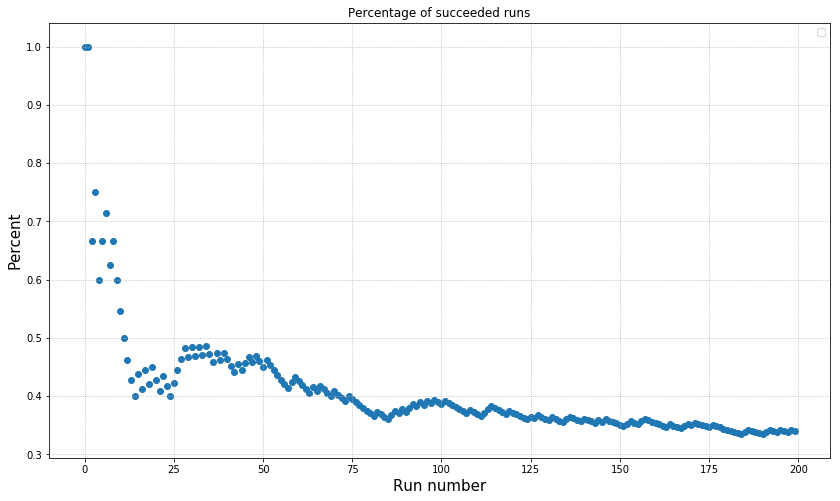

In [3]:
means = np.array([sum(score[: i + 1]) / (i + 1) for i in range(len(score))])

plt.figure(figsize=(14, 8))

plt.title('Percentage of succeeded runs')
plt.grid(ls=':')

plt.xlabel('Run number', fontsize=15) 
plt.ylabel('Percent', fontsize=15)

plt.scatter(np.arange(len(means)), means)
plt.legend()
plt.show()

Как видно, вероятность удачи с ростом попыток сходится примерно к $\frac{1}{3}$, что не совпадает с неофициальным результатом для русской вики - 73.7%. Либо это происходит из-за малого размера выборки и неудачного выбора случайных страниц, либо неофициальный результат неверен.

Теперь посмотрим на гистограмму длин путей:

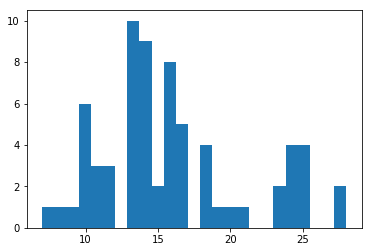

In [4]:
plt.hist(lens, 25)
plt.show()

Как видно, нормального распределения не наблюдается, наибольшее число цепочек имеет длину 13.

Теперь посмотрим на 10 наиболее часто встречающихся в цепочках статей:

In [5]:
total.most_common(10)

[('Философия', 68),
 ('Обобщение понятий ->', 67),
 ('Логическая операция ->', 67),
 ('Логика ->', 67),
 ('Категория (философия) ->', 36),
 ('Математический объект ->', 31),
 ('Абстрактный объект ->', 31),
 ('Абстракция ->', 31),
 ('Математика ->', 30),
 ('Множество ->', 25)]

На основе вида цепочек из файла test200.txt можно сделать вывод, что практически все случайные статьи приходят к философии через подцепочку 'Обобщение понятий -> Логическая операция -> Логика -> Философия'.